In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
diamonds = sns.load_dataset("diamonds")

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
diamonds.cut.nunique()

5

In [12]:
diamonds.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [10]:
diamonds.color.nunique()

7

In [13]:
diamonds.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [11]:
diamonds.clarity.nunique()

8

In [14]:
diamonds.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [5]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### 1. Elmasların carat ve price arasındaki ilişkiyi görselleştirerek bu ilişkinin lineer olup olmadığını Scatter plot + regression line ile inceleyiniz.

<Axes: xlabel='carat', ylabel='price'>

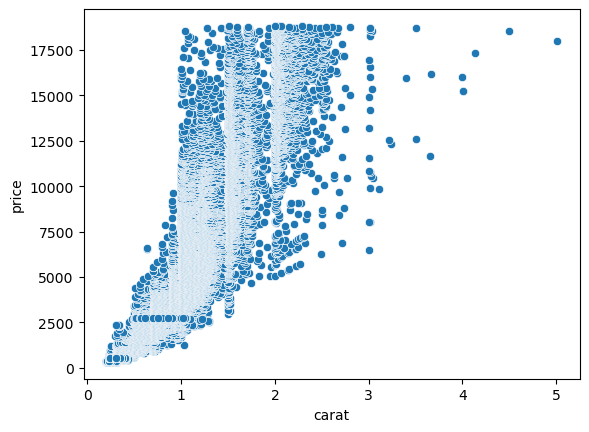

In [7]:
sns.scatterplot(x = "carat", y = "price", data = diamonds)

<Axes: xlabel='carat', ylabel='price'>

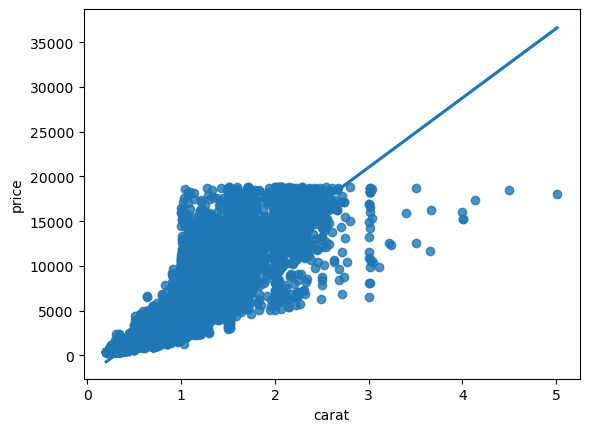

In [9]:
sns.regplot(x = "carat", y = "price", data = diamonds)

#### Scatterplot ve regplot incelendiğinde carat ve price arasında lineer bir ilişki olduğu görülmektedir. 

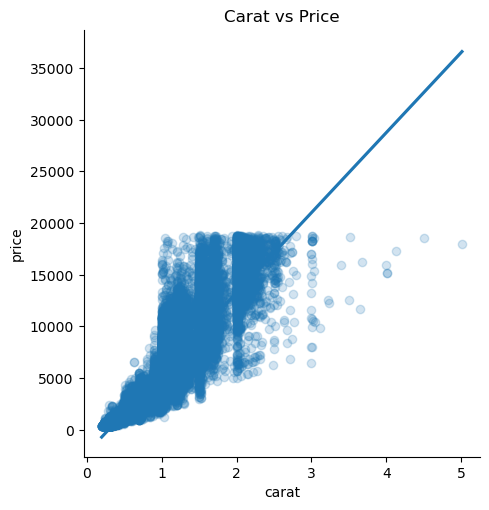

In [32]:
# ChatGPT
sns.lmplot(x='carat', y='price', data=diamonds, scatter_kws={'alpha':0.2})
plt.title('Carat vs Price')
plt.show()

### 2.	Elmasların cut (Fair, Good, Very Good, Premium, Ideal) kategorisine göre ortalama fiyatlarını barplot ile gösteriniz. En pahalı ortalamaya sahip cut hangisi?

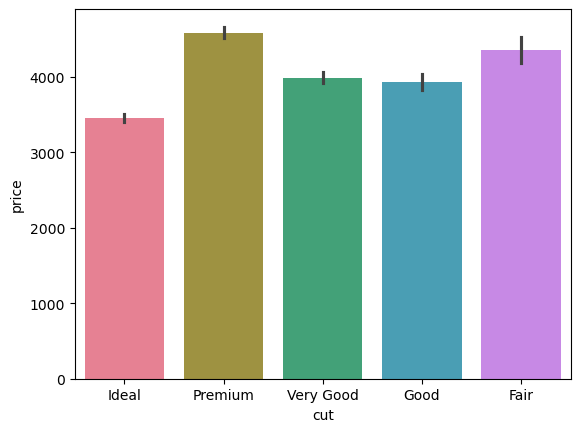

In [14]:
sns.barplot(x = "cut", y= "price", data = diamonds, palette = "husl");

#### En pahalı ortalamaya sahip cut'ın "premium" olduğu görülmektedir.

### 3.	color ve clarity kategorilerini çaprazlayarak her kombinasyon için ortalama fiyatı heatmap ile görselleştiriniz.

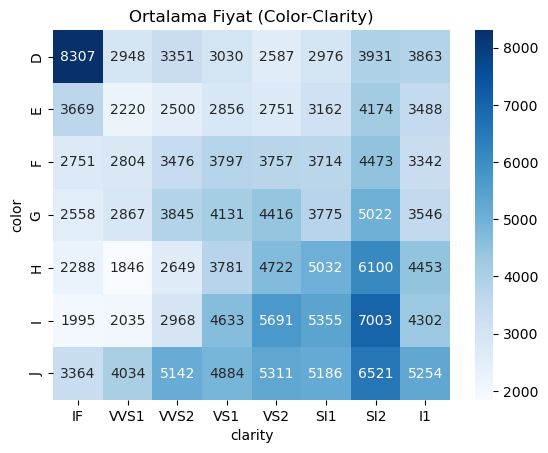

In [33]:
# ChatGPT
pivot = diamonds.pivot_table(values='price', index='color', columns='clarity', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Ortalama Fiyat (Color-Clarity)')
plt.show()

### 4.	carat değerine göre elmasları 4 eşit gruba (quartile) ayır ve her gruptaki ortalama fiyatı hesapla. En pahalı grup hangisi?

In [29]:
diamonds.carat.nunique()

273

In [30]:
diamonds.carat.value_counts()

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.50       1
2.70       1
3.40       1
4.00       1
3.67       1
Name: count, Length: 273, dtype: int64

In [35]:
diamonds['carat_group'] = pd.qcut(diamonds['carat'], 4, labels=['Q1','Q2','Q3','Q4'])
diamonds['carat_group']

0        Q1
1        Q1
2        Q1
3        Q1
4        Q1
         ..
53935    Q3
53936    Q3
53937    Q2
53938    Q3
53939    Q3
Name: carat_group, Length: 53940, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [36]:
diamonds.groupby('carat_group')['price'].mean()

carat_group
Q1     739.286151
Q2    1667.272336
Q3    4189.189044
Q4    9273.672995
Name: price, dtype: float64

### 5.	NumPy kullanarak fiyatların standart sapmasını manuel olarak hesapla (np.mean, np.sum, vs. ile). Pandas’ın .std() sonucu ile karşılaştır.

In [23]:
price_std_numpy = np.std(diamonds.price)
price_std_numpy

3989.402757628797

In [24]:
price_std_pandas = diamonds.price.std()
price_std_pandas

3989.4397381463023

In [ ]:
# ChatGPT

In [37]:
prices = diamonds['price'].values
prices

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [38]:
manual_std = np.sqrt(np.mean((prices - np.mean(prices))**2))
print('NumPy manuel std:', manual_std)

NumPy manuel std: 3989.4027576288736


In [39]:
print('Pandas std:', diamonds['price'].std())

Pandas std: 3989.4397381463023


### 6. Median vs Mean Price (Gruplara Göre)
cut kategorisine göre hem ortalama hem de medyan fiyatları hesapla. Bu değerleri yan yana bir barplot üzerinde göster. Ortalama ile medyan arasındaki fark hangi cut grubunda en büyük?

In [66]:
mean_median = diamonds.groupby("cut")["price"].agg(["mean","median"])
mean_median

,mean,median
cut,,
Ideal,3457.541970,1810.0
Premium,4584.257704,3185.0
Very Good,3981.759891,2648.0
Good,3928.864452,3050.5
Fair,4358.757764,3282.0


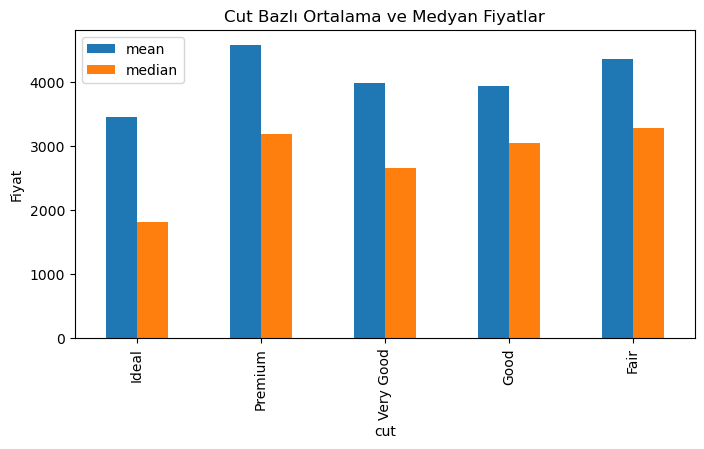

In [64]:
mean_median.plot(kind="bar", figsize=(8,4))
plt.title("Cut Bazlı Ortalama ve Medyan Fiyatlar")
plt.ylabel("Fiyat")
plt.show()

In [65]:
mean_median["Fark"] = mean_median["mean"] - mean_median["median"]
mean_median.sort_values("Fark", ascending=False)

,mean,median,Fark
cut,,,
Ideal,3457.541970,1810.0,1647.541970
Premium,4584.257704,3185.0,1399.257704
Very Good,3981.759891,2648.0,1333.759891
Fair,4358.757764,3282.0,1076.757764
Good,3928.864452,3050.5,878.364452


### 7. Carat Histogram (Bin Width Seçimi)
Carat değişkeninin histogramını çiz.
Aynı grafikte iki farklı bin ayarı dene:
Küçük bin width (örn. 0.05)
Büyük bin width (örn. 0.5)
Bin seçiminin dağılımı nasıl değiştirdiğini yorumla.

<Axes: xlabel='carat', ylabel='Count'>

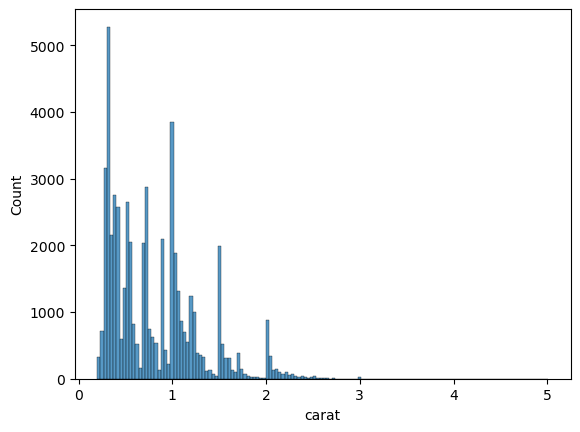

In [68]:
sns.histplot(x = "carat", data = diamonds)

<Axes: xlabel='carat', ylabel='Count'>

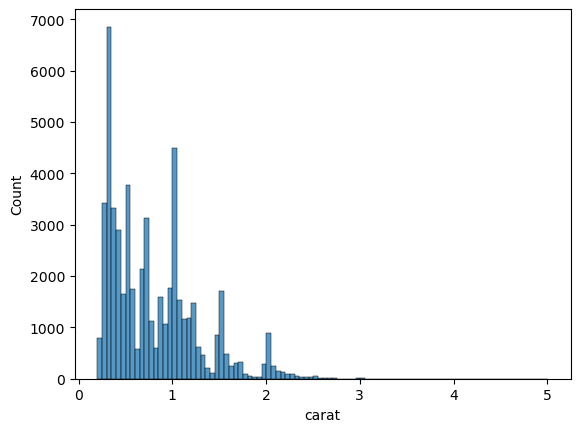

In [69]:
sns.histplot(x = "carat", binwidth = 0.05, data = diamonds)

<Axes: xlabel='carat', ylabel='Count'>

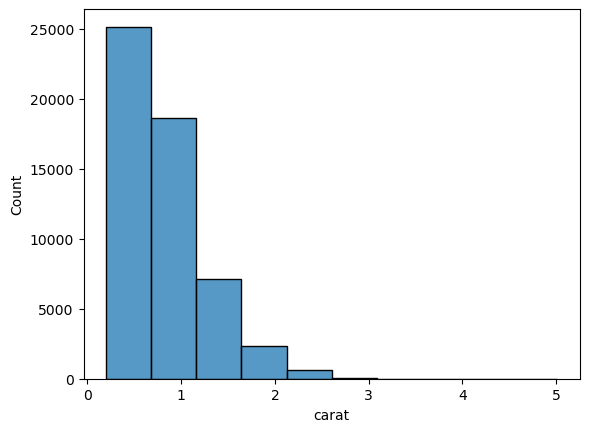

In [70]:
sns.histplot(x = "carat", binwidth = 0.5, data = diamonds)

### 8. Boxplot ile Outlier İncelemesi (Color’a Göre)
Elmas fiyatlarını color bazında boxplot ile görselleştir.
Hangi renk grubunda fiyat outlier’ları daha yoğun görünüyor?
Outlier’ların etkisini azaltmak için y-eksenini 15,000 ile sınırla.

<Axes: xlabel='color', ylabel='price'>

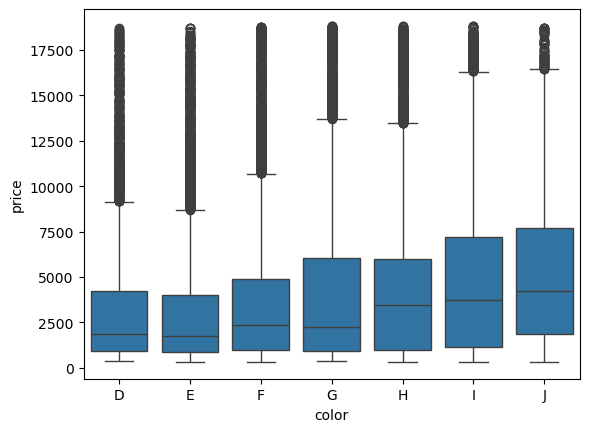

In [75]:
sns.boxplot(x = 'color', y = 'price', data = diamonds)

(0.0, 15000.0)

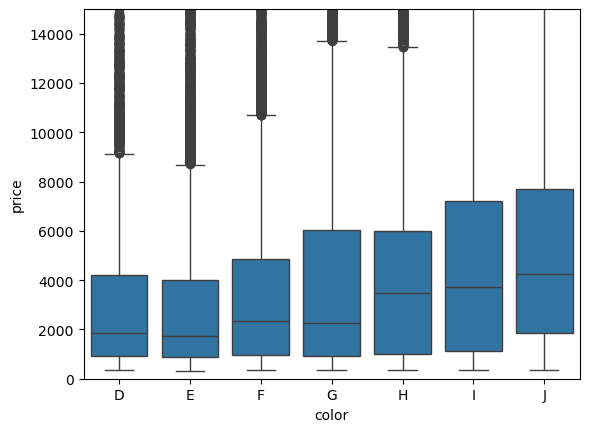

In [74]:
sns.boxplot(x = 'color', y = 'price', data = diamonds)
plt.ylim(0, 15000)

### 9. Price per Carat Trend (Line Plot)
Yeni bir değişken oluştur: price_per_carat = price / carat. Carat’ı 0.1 aralıklarla binle ve her bin için ortalama price_per_carat hesapla.
Bu trendi lineplot ile görselleştir. Carat büyüdükçe birim fiyat nasıl değişiyor?


In [78]:
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']
diamonds['price_per_carat']

0        1417.391304
1        1552.380952
2        1421.739130
3        1151.724138
4        1080.645161
            ...     
53935    3829.166667
53936    3829.166667
53937    3938.571429
53938    3205.813953
53939    3676.000000
Name: price_per_carat, Length: 53940, dtype: float64

<Axes: xlabel='carat', ylabel='price_per_carat'>

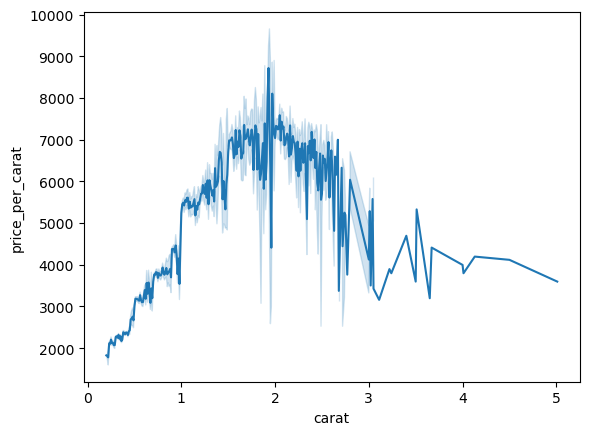

In [82]:
sns.lineplot(x = 'carat', y = 'price_per_carat', data = diamonds)

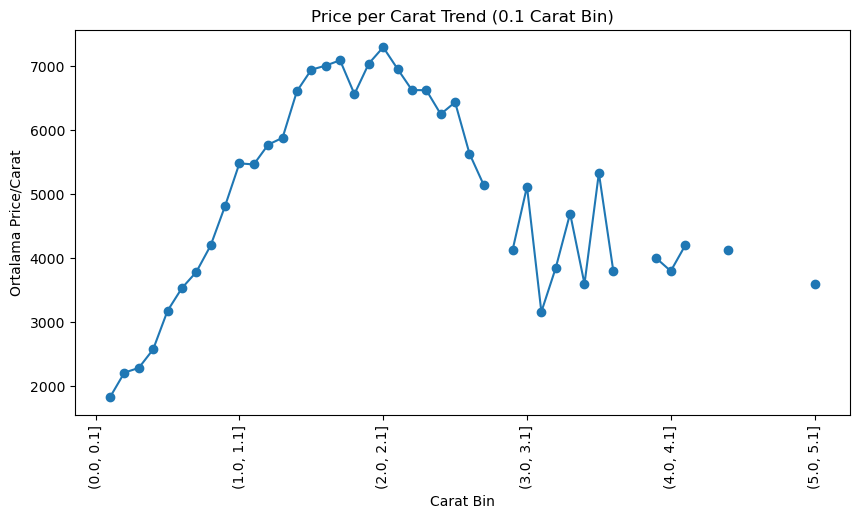

In [83]:
#ChatGPT
diamonds["carat_bin"] = pd.cut(diamonds["carat"], bins=np.arange(0, diamonds["carat"].max()+0.1, 0.1))
trend = diamonds.groupby("carat_bin")["price_per_carat"].mean()
plt.figure(figsize=(10,5))
trend.plot(marker="o")
plt.title("Price per Carat Trend (0.1 Carat Bin)")
plt.ylabel("Ortalama Price/Carat")
plt.xlabel("Carat Bin")
plt.xticks(rotation=90)
plt.show()

### 10. Heatmap ile Korelasyon İncelemesi
Numerik değişkenler arasındaki korelasyon matrisini Pandas ile hesapla. Seaborn heatmap ile görselleştir. Price ile en yüksek pozitif ve negatif korelasyona sahip değişkenleri işaretle (grafikte annot=True).

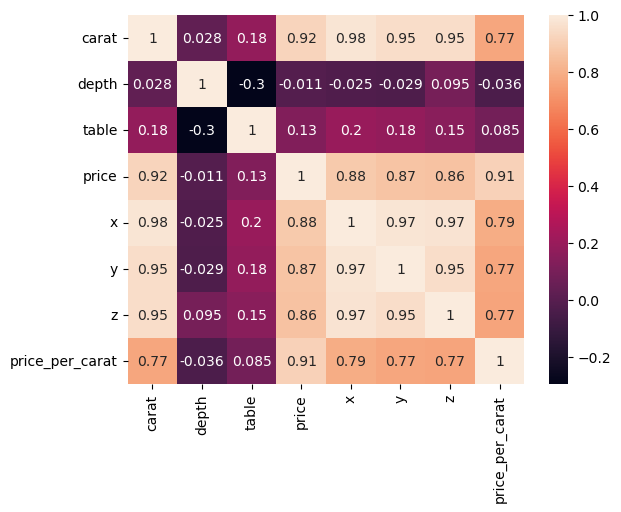

In [85]:
numeric_diamonds = diamonds.select_dtypes(include=[np.number])
corelation_matrix = numeric_diamonds.corr()

sns.heatmap(corelation_matrix, annot = True);

In [88]:
#ChatGPT
price_corr = corelation_matrix["price"].drop("price").sort_values(ascending=False)
print("En yüksek pozitif korelasyon:", price_corr.head(1))
print("En yüksek negatif korelasyon:", price_corr.tail(1))

En yüksek pozitif korelasyon: carat    0.921591
Name: price, dtype: float64
En yüksek negatif korelasyon: depth   -0.010647
Name: price, dtype: float64
